In [1]:
# COMP257_A5 - Autoencoders
# Author: Young Park

# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Load the data
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

# Split the training set, a validation set and a test set using a stratified sampling.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=13, stratify=faces.target)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13, stratify=y_train)

In [2]:
X_train.shape

(256, 4096)

In [3]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [4]:
print(X_train.shape, X_test.shape, X_val.shape)

(256, 4096) (80, 4096) (64, 4096)


In [5]:
input_shape = X_train.shape[1]
output_shape = input_shape

# Build the model
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam


def build_model(hidden_out, hidden_in, lr, loss_function):
    input_layer = Input(shape=(input_shape,))
    hidden_layer = Dense(hidden_out, activation='relu')(input_layer)
    hidden_layer = Dense(hidden_in, activation='relu')(hidden_layer)
    hidden_layer = Dense(hidden_out, activation='relu')(hidden_layer)
    output_layer = Dense(output_shape, activation='sigmoid')(hidden_layer)

    model = Model(input_layer, output_layer)

    custom_adam = Adam(learning_rate=lr)
    model.compile(loss=loss_function, optimizer=custom_adam)

    return model

In [6]:
from tensorflow import keras

model = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\bnmhj\AppData\Local\Temp\ipykernel_12760\1036630926.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [7]:
# Randomized search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal

param_grid = {
    'hidden_out': [300, 500],
    'hidden_in': [150, 250],
    'lr': [0.001, 0.0001],
    'loss_function': ['mse', 'binary_crossentropy'],
}

random_search = RandomizedSearchCV(model, param_grid)
random_search.fit(X_train, X_train, epochs=10, validation_data=(X_val, X_val))

Epoch 1/10
7/7 [==============================] - 1s 70ms/step - loss: 0.6928 - val_loss: 0.6901
Epoch 2/10
7/7 [==============================] - 0s 40ms/step - loss: 0.6875 - val_loss: 0.6821
Epoch 3/10
7/7 [==============================] - 0s 38ms/step - loss: 0.6791 - val_loss: 0.6724
Epoch 4/10
7/7 [==============================] - 0s 42ms/step - loss: 0.6692 - val_loss: 0.6646
Epoch 5/10
7/7 [==============================] - 0s 49ms/step - loss: 0.6633 - val_loss: 0.6596
Epoch 6/10
7/7 [==============================] - 0s 41ms/step - loss: 0.6590 - val_loss: 0.6568
Epoch 7/10
7/7 [==============================] - 0s 41ms/step - loss: 0.6567 - val_loss: 0.6550
Epoch 8/10
7/7 [==============================] - 0s 39ms/step - loss: 0.6553 - val_loss: 0.6534
Epoch 9/10
7/7 [==============================] - 0s 38ms/step - loss: 0.6535 - val_loss: 0.6516
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 0.6593
Epoch 1/10
7/7 [==============================] -

RandomizedSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000018CFFA179D0>,
                   param_distributions={'hidden_in': [150, 250],
                                        'hidden_out': [300, 500],
                                        'loss_function': ['mse',
                                                          'binary_crossentropy'],
                                        'lr': [0.001, 0.0001]})

In [8]:
# Summary of the results
print(random_search.best_params_)
print(random_search.best_score_)
print(random_search.best_estimator_)

{'lr': 0.001, 'loss_function': 'mse', 'hidden_out': 300, 'hidden_in': 150}
-0.024590207263827324


1/1 [==============================] - 0s 27ms/step


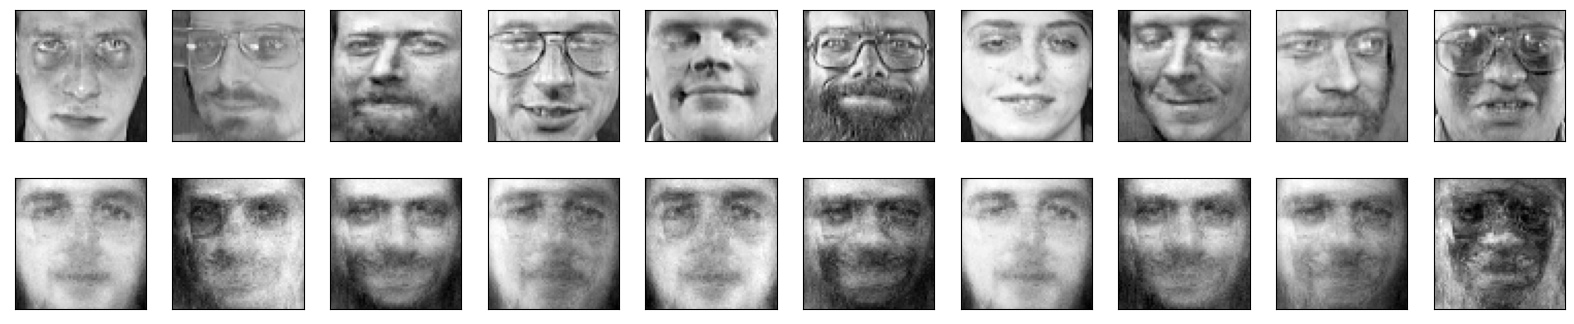

In [9]:
# Evaluate the best model with the test set
model = random_search.best_estimator_.model
model.evaluate(X_test, X_test)

# Plot the original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(model.predict(X_test[i].reshape(1, -1)).reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

